In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
btc_data = yf.download(tickers='BTC-USD', start='2018-01-01', end='2020-12-31')

[*********************100%%**********************]  1 of 1 completed


In [3]:
btc_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072
...,...,...,...,...,...,...
2020-12-26,24677.015625,26718.070312,24522.689453,26437.037109,26437.037109,48332647295
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893


In [4]:
def SMA(data, period='30', column='Close'):
    return data[column].rolling(window=period).mean()

In [5]:
btc_data['SMA'] = SMA(btc_data, 21)
btc_data['Simple Returns'] = btc_data.pct_change(1)['Close']
btc_data['log_returns'] = np.log(1+btc_data['Simple Returns'])
btc_data['Ratios'] = btc_data['Close']/btc_data['SMA']
btc_data

,Open,High,Low,Close,Adj Close,Volume,SMA,Simple Returns,log_returns,Ratios
Date,,,,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,NaN,NaN,NaN,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,NaN,0.097011,0.092589,NaN
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,NaN,0.014611,0.014505,NaN
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,NaN,0.026196,0.025858,NaN
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,NaN,0.117333,0.110945,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-26,24677.015625,26718.070312,24522.689453,26437.037109,26437.037109,48332647295,21314.835751,0.071853,0.069389,1.240312
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605,21644.701172,-0.006231,-0.006251,1.213798
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893,22020.566778,0.030927,0.030458,1.229978


In [6]:
btc_data['Ratios'].describe()

count    1075.000000
mean        1.008220
std         0.101311
min         0.573385
25%         0.951474
50%         1.006157
75%         1.070575
max         1.401300
Name: Ratios, dtype: float64

In [7]:
percentiles = [5, 10, 15, 20, 25, 50, 75, 80, 85, 90, 95]
ratios = btc_data['Ratios'].dropna()
percentile_values = np.percentile(ratios, percentiles)
percentile_values

array([0.84203252, 0.88471061, 0.91119362, 0.93415828, 0.95147371,
       1.00615738, 1.07057549, 1.08870674, 1.10650743, 1.13198904,
       1.17209539])

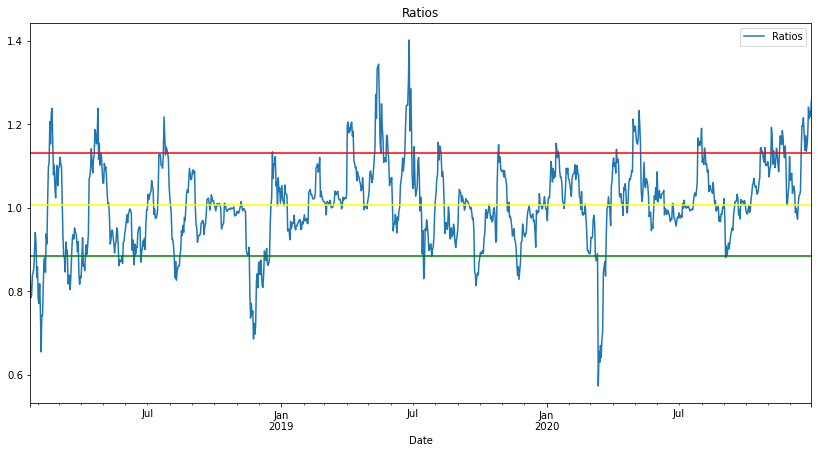

In [8]:
plt.figure(figsize=(14,7))
plt.title('Ratios')
btc_data['Ratios'].dropna().plot(legend=True)
plt.axhline(percentile_values[1], c='green', label='10th percentile')
plt.axhline(percentile_values[5], c='yellow', label='50th percentile')
plt.axhline(percentile_values[-2], c='red', label='90th percentile')

In [9]:
sell = percentile_values[-2]
buy = percentile_values[1]
btc_data['Positions'] = np.where(btc_data.Ratios > sell, -1, np.nan)
btc_data['Positions'] = np.where(btc_data.Ratios < buy, 1, btc_data['Positions'])
btc_data['Positions'] = btc_data['Positions'].ffill()
btc_data['Buy'] = np.where(btc_data.Positions == 1, btc_data['Close'], np.nan)
btc_data['Sell'] = np.where(btc_data.Positions == -1, btc_data['Close'], np.nan)

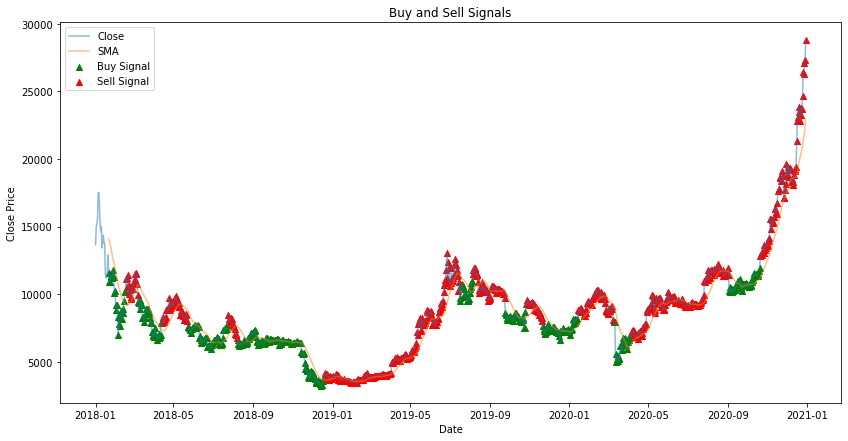

In [10]:
plt.figure(figsize=(14,7))
plt.title('Buy and Sell Signals')
plt.plot(btc_data['Close'], alpha = 0.5, label='Close')
plt.plot(btc_data['SMA'], alpha=0.5, label='SMA')
plt.scatter(btc_data.index, btc_data['Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(btc_data.index, btc_data['Sell'], color='red', label='Sell Signal', marker='^', alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [11]:
btc_data['Returns'] = btc_data.Positions.shift(1)*btc_data.log_returns
btc_data['Returns']

Date
2018-01-01         NaN
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
                ...   
2020-12-26   -0.069389
2020-12-27    0.006251
2020-12-28   -0.030458
2020-12-29   -0.010198
2020-12-30   -0.052625
Name: Returns, Length: 1095, dtype: float64

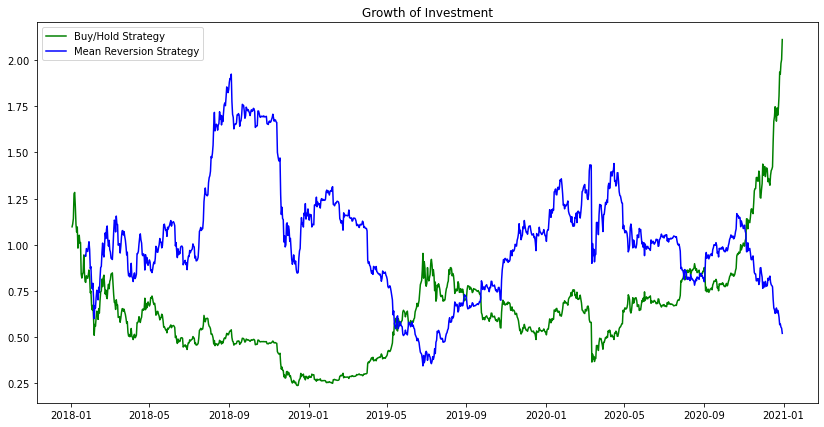

In [12]:
plt.figure(figsize=(14,7))
plt.title('Growth of Investment')
plt.plot(np.exp(btc_data['log_returns'].dropna()).cumprod(), color='green', label='Buy/Hold Strategy')
plt.plot(np.exp(btc_data['Returns'].dropna()).cumprod(), color='blue', label='Mean Reversion Strategy')
plt.legend()